# Lab 6: Training Deep Recurrent Neural Network
- นาย นันท์มนัส ตั้งประเสริฐ, 63070501040
- นาย สัณหณัฐ พรมจรรย์, 63070501069

Name your file to (first 2 student ID digits)_(last 4 student ID digits).ipynb

## Lab Instruction - Emojify

In this lab, you will learn how to train a deep recurrent neural network with Keras and Tensorflow. Your task is to perform sentiment analysis and predict the emoji that best represents the emotion in each sentence.


Read more in
 https://www.kdnuggets.com/2020/03/tensorflow-keras-tokenization-text-data-prep.html

or
https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

In [ ]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs:", len(physical_devices))

Num GPUs: 1


In [ ]:
physical_devices = tf.config.list_physical_devices('GPU')
try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
    # Invalid device or cannot modify virtual devices once initialized.
    pass

In [ ]:
# Import necessary libraries
from keras import *
from keras.preprocessing import text
from keras.preprocessing import sequence

In [ ]:
from sklearn.model_selection import train_test_split

import _utils as fn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read data

In [ ]:
# import data
df = pd.read_csv('/content/emoji_data.csv')
df.describe()

,emoji
count,7480.000000
mean,2.977273
std,1.999269
min,0.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,6.000000


In [ ]:
df.head()

,sentence,emoji
0,"During the period of falling in love, each tim...",0
1,When I was involved in a traffic accident.,1
2,When I was driving home after several days of...,2
3,When I lost the person who meant the most to me.,3
4,The time I knocked a deer down - the sight of ...,4


In [ ]:
x = df['sentence'].values
y = df['emoji'].values

In [ ]:
x[0]

'During the period of falling in love, each time that we met and especially when we had not met for a long time.'

In [ ]:
y[0]

0

### Split train-test-validate sets

In [ ]:
# Split train & test sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.1,stratify=y,random_state=0)
# Split train validate sets
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size =0.1,stratify=y,random_state=0)

Text(0.5, 1.0, 'y val')

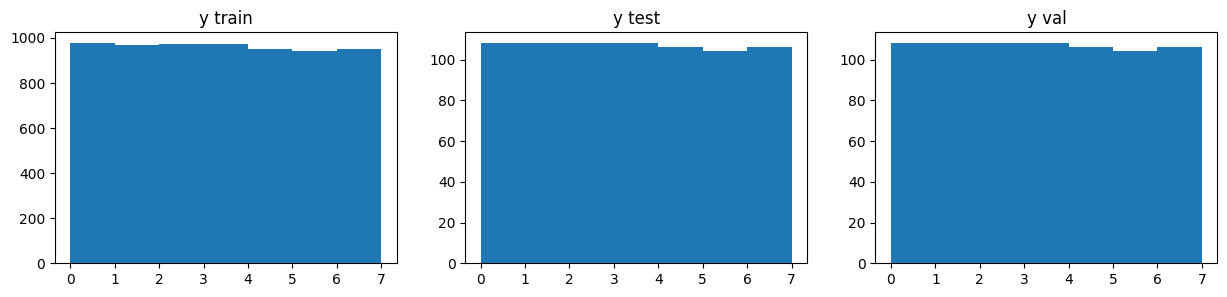

In [ ]:
# Plot the target distributions
fig,ax =plt.subplots(1,3,figsize=(15,3))

bins = [0,1,2,3,4,5,6,7]

ax[0].hist(y_train,bins=bins)
ax[0].set_title('y train')
ax[1].hist(y_test,bins=bins)
ax[1].set_title('y test')
ax[2].hist(y_val,bins=bins)
ax[2].set_title('y val')

### Preprocess data: Tokenizer & Padding

In [ ]:
# Define parameter
max_word = 5000
maxlen = 20
max_features = 5000

First, we create the ```Tokenizer``` object and specify how many words we want to keep in our vocabulary after tokenization. Following this step, previously unseen words would simply be removed from our vocabulary.

In [ ]:
# Define Tokenizer
tokenizer = text.Tokenizer(num_words = max_word) #define corpus to keep the maximum number of words
tokenizer.fit_on_texts(x_train)

 The ```word index``` displays a mapping that converts words in our vocabulary into numeric representations, which will be necessary for encoding our sequences.

In [ ]:
tokenizer.word_index

In [ ]:
tokenizer.num_words

5000

In [ ]:
from keras.utils import pad_sequences

In [ ]:
# Data preprocessing function
def preprocess_fn(data):
    sequences = tokenizer.texts_to_sequences(data)
    padding_sequences = pad_sequences(sequences,maxlen = maxlen)

    return padding_sequences,sequences

Here, ```Text to Sequences``` converts our text sentences from, for example,

"My name is Matthew"

 to

  "6 8 2 19"
  
refers to the corresponding words in the index.

```padding``` is used to pad all other sequences with extra '0's until the sentence's maximum length is reached, and it will also truncate any sequences that are longer than the maximum length.

``` maxlen``` must be the maximum length of the sentence.

In [ ]:
len(max(x_train, key=len))

863

In [ ]:
# Preprocess data
x_train,sequences_x_train =  preprocess_fn(x_train)
x_val,sequences_x_val = preprocess_fn(x_val)
x_test,sequences_x_test = preprocess_fn(x_test)

The shape of our training sequences matrix indicates the number of sentences (sequences) in our training set (6732) as well as the length of our longest sequence (maxlen, or 20).

In [ ]:
x_train.shape

(6732, 20)

In [ ]:
len(max(x_train, key=len))

20

In [ ]:
x_train

array([[ 338,    4,  719, ...,    6, 1529,   93],
       [   0,    0,    0, ...,  408,    4,   12],
       [   4,  345,    3, ...,   11,  172,  173],
       ...,
       [   0,    0,    0, ...,  127,    5,   22],
       [   0,    0,    0, ...,   86, 1403,   12],
       [  14,   40,    4, ...,  981,    4,   12]], dtype=int32)

In [ ]:
sequences_x_train

[[188,
  9,
  3,
  1406,
  3199,
  27,
  11,
  4,
  221,
  17,
  107,
  42,
  5,
  100,
  240,
  2584,
  4,
  17,
  27,
  202,
  17,
  4,
  3,
  98,
  41,
  402,
  784,
  6,
  1528,
  9,
  81,
  784,
  14,
  338,
  4,
  719,
  27,
  62,
  4,
  345,
  66,
  3199,
  17,
  7,
  314,
  561,
  35,
  2,
  81,
  4453,
  6,
  1529,
  93],
 [1, 46, 23, 31, 161, 8, 3, 63, 164, 1, 661, 6, 720, 408, 4, 12],
 [304,
  18,
  321,
  87,
  721,
  4,
  345,
  3,
  96,
  456,
  10,
  242,
  33,
  26,
  188,
  1,
  23,
  21,
  111,
  6,
  1204,
  1,
  11,
  172,
  173],
 [1,
  688,
  4,
  5,
  56,
  19,
  2,
  507,
  25,
  11,
  1663,
  508,
  6,
  7,
  382,
  4,
  58,
  2162,
  1,
  374,
  4,
  578,
  26,
  2,
  633,
  9,
  2,
  579,
  6,
  133,
  130,
  2163,
  66,
  562,
  25,
  202,
  12,
  2,
  633,
  10,
  722],
 [8,
  4454,
  16,
  3200,
  457,
  1664,
  114,
  5,
  121,
  6,
  1882,
  12,
  4,
  221,
  88,
  152,
  103,
  383,
  188],
 [45, 220, 67, 1142, 143],
 [8,
  1,
  458,
  13,
  1,
  11,
  

### Build a model with word embedding

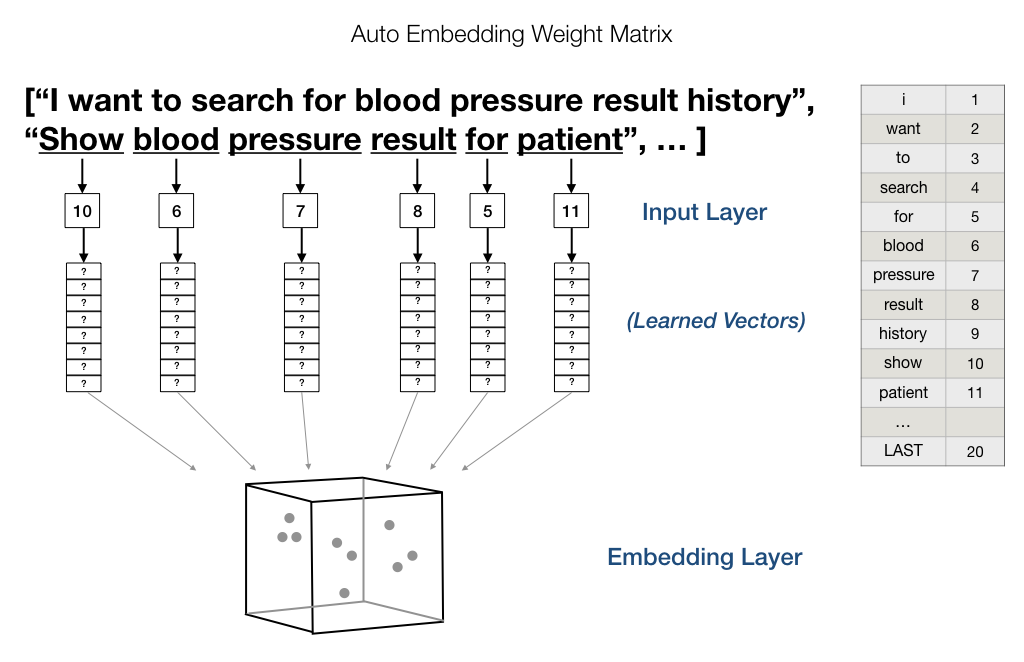


Embedding

```
Embedding(input_dim , output_dim , input_length)
```
```input_dim``` is the size of the vocabulary in the text data. For example, if your data is integer encoded values between 0-5000 vocabulary, the vocabulary size would be 5000 words.

```output_dim``` is the size of the vector space in which words will be embedded. It specifies the size of the output vectors from this layer for each word. It could be 32, 100, or even larger. Test different values for your problem.

```input_length```is the length of input sequences, as defined for any Keras model input layer. For example, if all of your input documents are 20 words long, this would be 20 ( or max length from previous section).




In [ ]:
# Define model
rnn = models.Sequential()
rnn.add(layers.Embedding(max_features,32,input_length=maxlen))

rnn.add(layers.SimpleRNN(32))
rnn.add(layers.Dense(64,activation='elu'))
rnn.add(layers.Dense(7,activation='softmax'))

In [ ]:
# Compile model
rnn.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [ ]:
# Show model structure
rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 32)            160000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dense_1 (Dense)             (None, 7)                 455       
                                                                 
Total params: 164647 (643.15 KB)
Trainable params: 164647 (643.15 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Fit model
his =  rnn.fit(x_train,y_train,epochs=5,batch_size=32,validation_data=(x_val,y_val))

Epoch 1/5
211/211 [==============================] - 20s 63ms/step - loss: 1.8691 - acc: 0.2265 - val_loss: 1.8423 - val_acc: 0.2607
Epoch 2/5
211/211 [==============================] - 5s 24ms/step - loss: 1.4623 - acc: 0.4682 - val_loss: 1.5267 - val_acc: 0.4011
Epoch 3/5
211/211 [==============================] - 6s 30ms/step - loss: 1.1282 - acc: 0.6050 - val_loss: 1.6643 - val_acc: 0.4318
Epoch 4/5
211/211 [==============================] - 5s 24ms/step - loss: 0.8925 - acc: 0.6912 - val_loss: 1.6171 - val_acc: 0.4372
Epoch 5/5
211/211 [==============================] - 6s 30ms/step - loss: 0.6966 - acc: 0.7720 - val_loss: 1.7160 - val_acc: 0.4586


Last train accuracy: 0.7719845771789551
Last validation accuracy: 0.4585561454296112


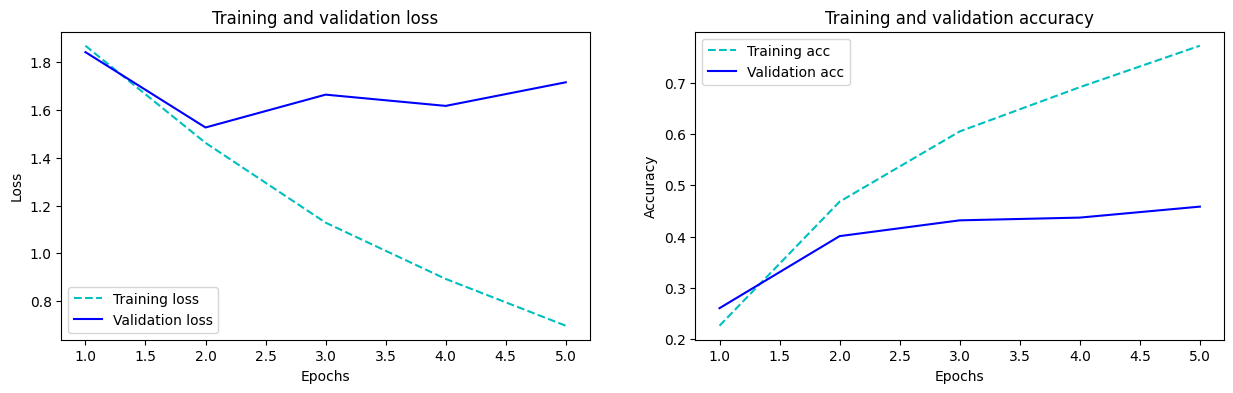

In [ ]:
# Plot accuracy and loss over each epoch
fn.show_result(his)

### Evaluate Model
Baseline of the model is 14.28% (Random prediction)

In [ ]:
# Evaluate model with test data
rnn.evaluate(x_test,y_test)

24/24 [==============================] - 0s 4ms/step - loss: 1.7160 - acc: 0.4586


[1.7160017490386963, 0.4585561454296112]

In [ ]:
# Show confusion matrix and prediction report
fn.evaluation_report(rnn,x_test,y_test)

24/24 [==============================] - 0s 3ms/step
[[66  6  5  6 10 12  3]
 [ 5 61  4  5  6 17 10]
 [ 6  5 33  3  9 22 30]
 [ 9  5 10 47  4 11 22]
 [ 9  5 19  1 49 18  5]
 [ 6 13 14  1  6 39 25]
 [ 1 10 19  7  0 21 48]]
              precision    recall  f1-score   support

           0       0.65      0.61      0.63       108
           1       0.58      0.56      0.57       108
           2       0.32      0.31      0.31       108
           3       0.67      0.44      0.53       108
           4       0.58      0.46      0.52       106
           5       0.28      0.38      0.32       104
           6       0.34      0.45      0.39       106

    accuracy                           0.46       748
   macro avg       0.49      0.46      0.47       748
weighted avg       0.49      0.46      0.47       748

Loss: 1.7160017490386963 Accuracy: 0.4585561454296112


array([5, 6, 2, 2, 6, 3, 6, 5, 6, 6, 4, 3, 1, 2, 5, 1, 2, 5, 2, 6, 4, 1,
       4, 6, 4, 4, 3, 1, 5, 2, 3, 2, 5, 4, 6, 0, 6, 2, 6, 0, 0, 4, 0, 5,
       4, 6, 3, 3, 5, 3, 6, 0, 1, 0, 5, 0, 0, 2, 3, 5, 0, 1, 0, 0, 0, 6,
       5, 2, 5, 6, 4, 4, 1, 0, 0, 4, 6, 3, 1, 5, 2, 2, 3, 0, 5, 6, 6, 2,
       2, 2, 0, 1, 6, 6, 0, 0, 4, 3, 5, 5, 2, 5, 6, 5, 5, 1, 4, 0, 0, 3,
       1, 1, 0, 6, 0, 1, 1, 2, 0, 6, 1, 2, 3, 0, 4, 4, 1, 4, 4, 2, 6, 6,
       1, 2, 1, 0, 4, 6, 2, 5, 5, 4, 6, 5, 6, 6, 2, 5, 3, 1, 6, 1, 5, 1,
       5, 3, 0, 6, 4, 2, 6, 6, 0, 0, 3, 3, 5, 6, 2, 3, 1, 0, 4, 0, 3, 2,
       5, 2, 1, 4, 6, 1, 4, 5, 0, 1, 0, 5, 1, 3, 3, 1, 1, 3, 5, 1, 5, 4,
       4, 6, 5, 4, 6, 0, 5, 6, 2, 2, 1, 1, 0, 5, 4, 3, 2, 3, 0, 6, 5, 2,
       3, 2, 4, 5, 2, 2, 4, 1, 2, 0, 4, 0, 5, 0, 1, 6, 6, 6, 6, 1, 6, 6,
       1, 4, 2, 2, 0, 1, 2, 5, 5, 5, 6, 2, 3, 5, 4, 4, 3, 6, 0, 0, 3, 5,
       2, 4, 6, 6, 6, 5, 4, 0, 5, 1, 3, 5, 1, 6, 3, 5, 2, 0, 5, 1, 6, 6,
       6, 2, 5, 0, 6, 6, 0, 5, 0, 5, 2, 6, 2, 1, 6,

In [ ]:
rnn.save('model1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/2
211/211 [==============================] - 12s 51ms/step - loss: 0.5363 - acc: 0.8277 - val_loss: 1.9376 - val_acc: 0.4519
Epoch 2/2
211/211 [==============================] - 6s 28ms/step - loss: 0.4016 - acc: 0.8746 - val_loss: 2.2398 - val_acc: 0.4184
Last train accuracy: 0.8746286630630493
Last validation accuracy: 0.41844919323921204


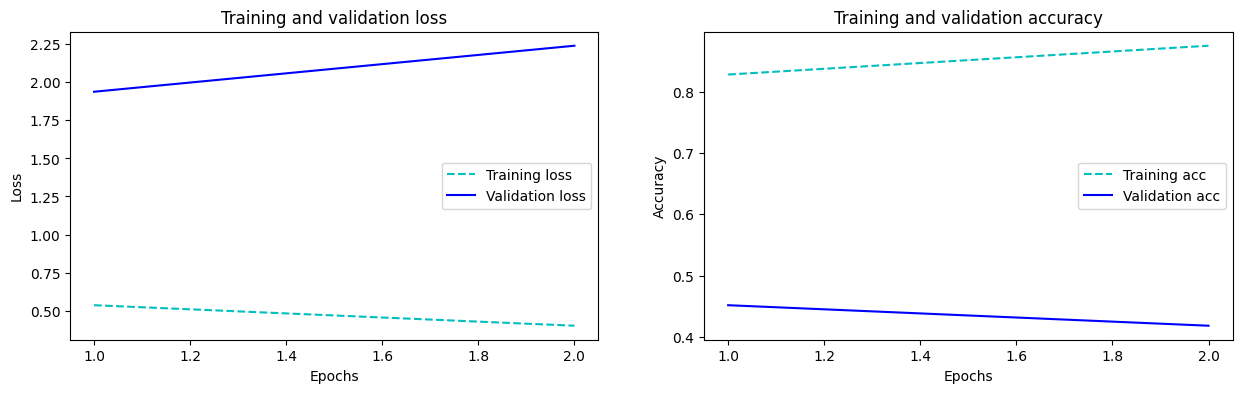

In [ ]:
# Now tune your model
rnn_t = models.load_model('model1.h5')

his_t =  rnn_t.fit(x_train,y_train,epochs=2,batch_size=32,validation_data=(x_val,y_val))

# Plot accuracy and loss over each epoch
fn.show_result(his_t)

In [ ]:
# Evaluate model with test data
rnn_t.evaluate(x_test,y_test)

24/24 [==============================] - 0s 4ms/step - loss: 2.2398 - acc: 0.4184


[2.239750862121582, 0.41844919323921204]

In [ ]:
# Show confusion matrix and prediction report
fn.evaluation_report(rnn_t,x_test,y_test)

24/24 [==============================] - 0s 3ms/step
[[49  4  9 15 22  6  3]
 [ 5 53  7 11  6 17  9]
 [ 3  7 31 10  9 20 28]
 [ 4  4 13 58  6  9 14]
 [ 5  1 23  7 47 16  7]
 [ 3  9 18  8  7 38 21]
 [ 1 14 21 14  2 17 37]]
              precision    recall  f1-score   support

           0       0.70      0.45      0.55       108
           1       0.58      0.49      0.53       108
           2       0.25      0.29      0.27       108
           3       0.47      0.54      0.50       108
           4       0.47      0.44      0.46       106
           5       0.31      0.37      0.33       104
           6       0.31      0.35      0.33       106

    accuracy                           0.42       748
   macro avg       0.44      0.42      0.42       748
weighted avg       0.44      0.42      0.43       748

Loss: 2.239750862121582 Accuracy: 0.41844919323921204


array([5, 6, 2, 5, 6, 3, 3, 2, 2, 6, 4, 3, 1, 2, 5, 1, 2, 5, 2, 6, 4, 4,
       4, 6, 4, 2, 3, 1, 2, 2, 3, 2, 5, 4, 2, 4, 6, 2, 2, 0, 0, 4, 0, 5,
       4, 6, 3, 3, 3, 3, 3, 0, 3, 4, 5, 0, 3, 2, 3, 5, 0, 1, 0, 4, 3, 6,
       5, 2, 3, 6, 4, 2, 1, 0, 4, 2, 6, 3, 1, 2, 2, 6, 3, 3, 5, 1, 2, 2,
       6, 2, 0, 1, 4, 6, 4, 0, 4, 3, 5, 5, 2, 5, 4, 5, 5, 1, 4, 0, 0, 3,
       1, 3, 4, 1, 0, 1, 1, 2, 3, 6, 1, 2, 3, 0, 2, 4, 3, 4, 4, 2, 6, 6,
       6, 6, 3, 0, 4, 6, 2, 5, 5, 4, 2, 5, 1, 6, 2, 5, 3, 1, 1, 1, 5, 1,
       5, 3, 0, 6, 4, 2, 6, 1, 4, 0, 2, 3, 2, 1, 2, 3, 5, 0, 4, 3, 3, 6,
       5, 6, 1, 4, 5, 1, 4, 5, 3, 1, 0, 5, 1, 3, 4, 3, 1, 3, 0, 1, 5, 4,
       4, 5, 6, 4, 6, 3, 5, 1, 2, 2, 1, 6, 0, 2, 4, 4, 1, 3, 0, 6, 6, 5,
       3, 2, 4, 4, 2, 2, 4, 1, 3, 4, 2, 0, 5, 0, 1, 3, 6, 6, 6, 1, 6, 5,
       3, 4, 2, 2, 0, 5, 2, 5, 5, 5, 6, 2, 3, 5, 4, 4, 3, 6, 0, 3, 3, 5,
       2, 4, 6, 6, 3, 5, 4, 3, 6, 1, 3, 6, 1, 6, 3, 3, 2, 0, 5, 1, 6, 2,
       5, 2, 5, 3, 6, 6, 4, 5, 0, 5, 5, 6, 2, 1, 6,

#### Play with your model
**Emoji**
0 = joy 😆
1 = fear 😱
2 = anger 😡
3 = sadness 😭
4 = disgust 🤮
5 = shame 😳
6 = guilt 😞

In [ ]:
# Define prediction function
def predict_emoji(input_text,model):

    prepro_input = preprocess_fn([input_text])
    prepro_input = prepro_input[0]
    pred_class = model.predict(prepro_input).argmax(axis =1)

    label_to_emoji = ['😆','😱','😡','😭','🤮','😳','😞']

    result = label_to_emoji[int(pred_class)]

    print('%s %s'%(input_text,result))

In [ ]:
# Test your model
input_text =' The countdown to the new year filled the room with a sense of eager anticipation.'
predict_emoji(input_text,rnn)

1/1 [==============================] - 0s 40ms/step
 The countdown to the new year filled the room with a sense of eager anticipation. 😆


In [ ]:
# Test your model
input_text ='The eerie silence in the dark forest filled him with a sense of dread.'
predict_emoji(input_text,rnn)

1/1 [==============================] - 0s 47ms/step
The eerie silence in the dark forest filled him with a sense of dread. 😱


In [ ]:
# Test your model
input_text ='The unfair decision made her furious, and she couldn\'t help but raise her voice.'
predict_emoji(input_text,rnn)

1/1 [==============================] - 0s 19ms/step
The unfair decision made her furious, and she couldn't help but raise her voice. 😡


In [ ]:
# Test your model
input_text ='He felt a deep sense of loss when his beloved pet passed away.'
predict_emoji(input_text,rnn)

1/1 [==============================] - 0s 19ms/step
He felt a deep sense of loss when his beloved pet passed away. 😭


In [ ]:
# Test your model
input_text ='The rotten smell from the trash bin made her gag.'
predict_emoji(input_text,rnn)

1/1 [==============================] - 0s 19ms/step
The rotten smell from the trash bin made her gag. 🤮


In [ ]:
# Test your model
input_text ='He didn\'t dare face anyone.'
predict_emoji(input_text,rnn)

1/1 [==============================] - 0s 22ms/step
He didn't dare face anyone. 😳


In [ ]:
# Test your model
input_text ='He couldn\'t help but feel a pang of regret for not taking that opportunity.'
predict_emoji(input_text,rnn)

1/1 [==============================] - 0s 30ms/step
He couldn't help but feel a pang of regret for not taking that opportunity. 😞


**1.What is your testing sentence?**
- Answer: Her dreams were shattered when her art project didn't win the competition.

**2.What do you think the emoji of your sentence should be?**
- Answer: guilt 😞


**3.What is the predictive emoji from your model?**
- Answer: shame 😳


In [ ]:
# Test your model
input_text ='My dreams were shattered when project didn\'t win the competition.'
predict_emoji(input_text,rnn)

1/1 [==============================] - 0s 53ms/step
My dreams were shattered when project didn't win the competition. 😳


**4.Are your selected emoji and the predictive emoji the same? What do you think the network can detect?**
- Discuss: การ predictive emoji ไม่เหมือนกัน โดย model มีการ detect คำ **dreams were shattered** ที่มีโอกาสที่คำนี้มีความหมายที่แตกต่างกันไปตามรูปแบบของประโยคและ  dataset ไม่เพียงพอ ต้องมีการเพิ่มข้อมูลที่มีหลายลักษณะมากขึ้นเพื่อมาใช้ในการ train data และเตรียมข้อมูลเพิ่มสำหรับการ test data เพิ่มเติมสำหรับกรณีเฉพาะ

ผลการทดลองปรับหลายๆ ค่าไม่ได้มีผลที่ออกมาโดดเด่นอะไรมาก ต่ำสุดอยู่ที่ประมาณ 30 มากสุดที่ 49
1. เปลี่ยนเป็นpost padding  ผลลัพทธ์แย่กว่า pre padding เล็กน้อย
คิดว่า pre กับ post จะเติม 0 เข้าไปข้างหน้ากับข้างหลัง ถ้าการ express emotion ออกมาท้ายประโยคหรือต้นประโยค
น่าจะทำให้ผลต่างตรงนี้มีออกมาอย่างมีนัยสำคัญ แต่จากผลการทดลองไม่ได้เห็นความแตกต่างที่มากขนาดนั้น
2. คิดว่า max word กับ max feature ควรจะเท่ากัน ถ้าเกินจำนวนตรงนี้ต่างกันเยอะๆ จะทำให้ model ผิดพลาดเยอะ
เพราะการแบ่ง tokenization ออกมา 5000 คำ ในmodel ก็ควรมี5000 features แต่การลองปรับ ให้ word มากกว่า
หรือน้อยกว่า ก็ไม่ได้เห็นผลที่แย่กว่าเดิมขนาดนั้น และบางครั้งยังมีผลดีกว่า 5000 5000 ในบางรันด้วยซ้ำ
3. Model tuning ได้ลองปรับ output dimension ให้เป็น100ตามที่มีการแนะนำ และได้ลองปรับ
node ของ simplernn เป็น 64 output dim เป็น 64 และ dense เป็น64 เพื่อให้ทุก layer เป็น fully connected
แต่ผลลัพทธ์ก็ยังคงไม่ได้ดีขึ้นหรือแย่ลงอย่างมีนัยสำคัญเช่นกัน ทั้งใน evaluation report และใน graph